<a href="https://colab.research.google.com/github/dudgus7477/deeplearning/blob/main/(%EC%8B%A4%EC%8A%B5%EC%9A%A9)%EC%BD%94%EB%A1%9C%EB%82%98%20%ED%99%95%EC%A7%84%EC%9E%90%20%EC%88%98%20%EC%98%88%EC%B8%A1%20%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전염병 예측 인공지능
- 이전 3일(일수 변경 가능)의 확진자 수를 토대로 다음 날의 확진자 수를 예측하는 간단한 인공지능
- 실제 확진자 수와 비슷하게 예측하는 모습을 살펴보자!

☁ 3일 동안의 확진자 수 추이를 보고 다음 날(4일차)의 확진자 수를 예측
> 연속된 데이터의 형태에서 그 패턴을 찾아내는 순환 신경망(RNN) 방식이 필요!
- 만약 100일 동안의 확진자 수가 있다면 가장 먼저 1,2,3일차의 확진자 수가 어떻게 변하였는지 살펴보고 4일차의 확진자 수를 학습
- 2,3,4일차의 확진자 수가 어떻게 변하였는지 살펴보고 5일차의 확진자 수를 학습

### RNN 체험하기
구글에서 Sketch rnn이라고 검색해서 sketch-rnn - Magenta Tensorflow선택

#코로나 확진자 수 예측 인공지능

In [1]:
#라이브러리 설치
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense  #RNN을 사용할 수 있게 해주는 도구
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error #결과 정확도 계산(실제 값과 예측 값의 차이를 사용하여 오류 구함)
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [2]:
#데이터 불러오기
!git clone https://github.com/dudgus7477/deeplearning.git
dataframe = read_csv() #확진자 수만 사용
print(dataframe)
dataset = dataframe.values #확진자수만
dataset = dataset.astype('float32') #정규화

- 첫 번째 열(Date) : 날짜
- 두 번째 열(Inspected) : 검사자 수
- 세 번째 열(Negative) : 검사자 중 음성
- 네 번째 열(Confirmed) : 확진자 수
- 다섯 번째 열(Recovered) : 회복한 사람의 수
- 마지막 열(Deaths) : 사망자 수

In [3]:
#데이터 정규화(0과 1사이의 값으로 바꾸어서 사용)


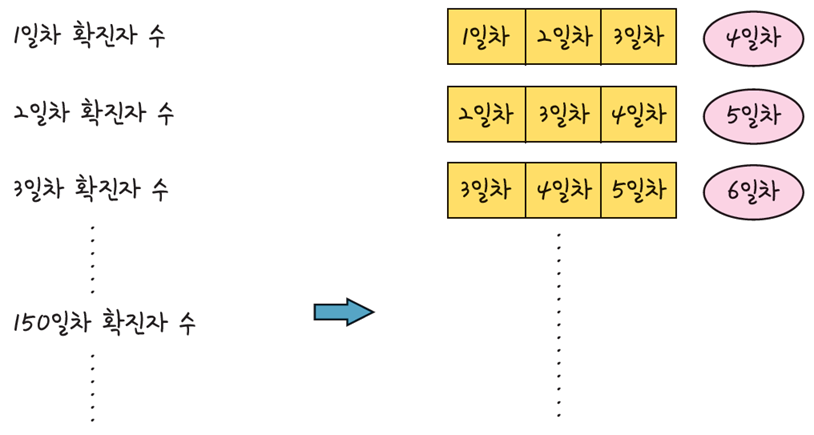

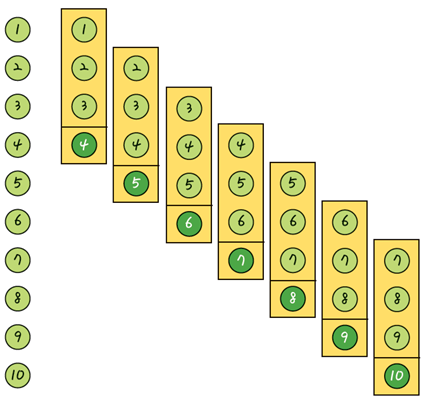

> 먼저 1일차부터 3일차까지를 뽑아서 x_data에 넣고, 그다음 4일차를 y_data에 넣는다


> 그리고 2일차부터 4일차까지를 뽑아서 x_data에 넣고, 그다음 5일차를 y_data에 넣는식으로 이 과정을 총 7번 반복하면 10일치의 데이터를 얻을 수 있음!



In [ ]:
#데이터 형태 변경하기


In [5]:
#입력 데이터 생성하기
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

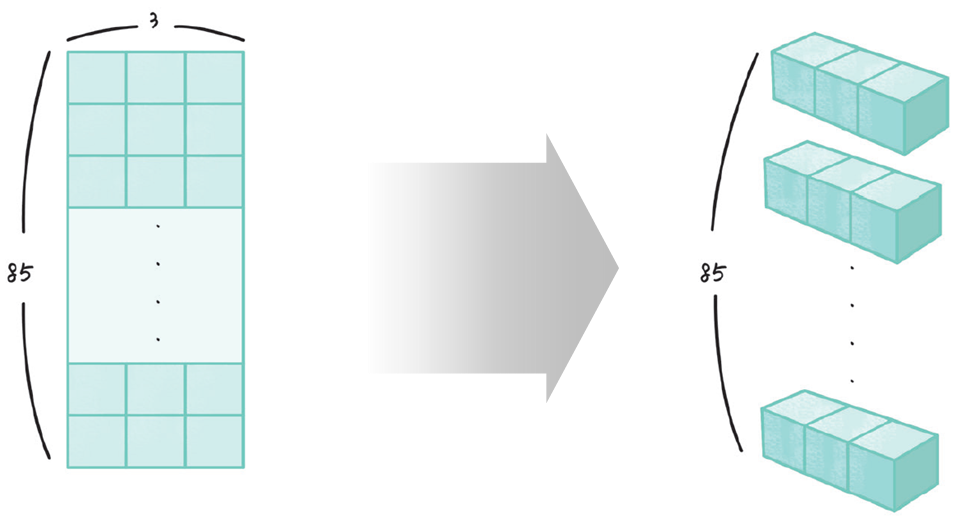

In [6]:
#인공지능 모델에 넣어줄 형태로 변환
#2차원 배열 -> 3차원 배열로
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
print(X_train.shape)
print(X_test.shape)

In [7]:
#인공지능 모델 만들기


In [8]:
#모델 학습


#데이터 예측하기

In [9]:
#예측데이터 만들기

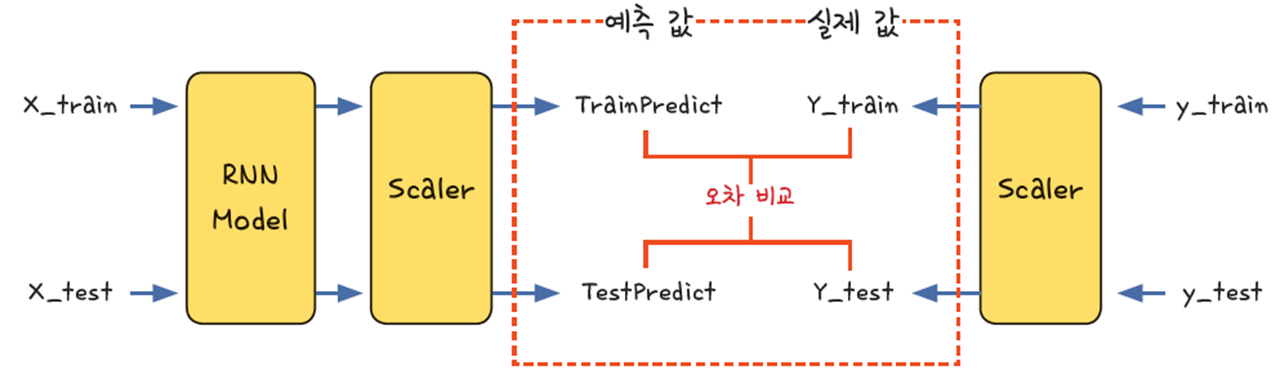

In [10]:
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print('Train Score : %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
print('Test Score : %.2f RMSE' %(testScore))

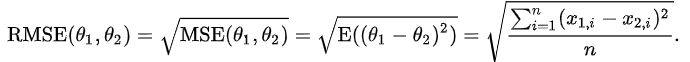
- 평균 제곱근 오차 : 예측한 값과 실제 값 사이의 평균 차이를 측정
- 값이 낮을수록 예측모델이 더 좋음
- 학습의 반복횟수를 늘리거나 모델의 형태를 변경하면 이 값은 줄어들 수 있다.

In [11]:
#그래프로 확인해보기
